In [ ]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1Ljk8zoMN_qvWfnK1v7qCPqoDoRmiacaf/view?usp=sharing'
link2 = 'https://drive.google.com/file/d/1hYwXfVf15FAIBLEbaeWaKP6H60rBRnoB/view?usp=sharing'
  
import pandas as pd
import numpy as np 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn import metrics
from scipy.spatial import distance
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt 

import joblib

import seaborn as sns
  
# to get the id part of the file
id = link.split("/")[-2]
id2 = link2.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_data.txt')  
  
dataset = pd.read_csv('train_data.txt', names=["id", "Jitter (local)", "Jitter (local, absolute)", 
                                               "Jitter (rap)", "Jitter (ppq5)", "Jitter (ddp)", 
                                               "Shimmer (local)", "Shimmer (local, dB)", "Shimmer (apq3)",
                                               "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)",
                                               "AC", "NTH", "HTN", "Median pitch", "Mean pitch",
                                               "Standard deviation", "Minimum pitch", "Maximum pitch",
                                               "Number of pulses", "Number of periods", "Mean period",
                                               "Standard deviation of period", "Fraction of locally unvoiced frames",
                                               "Number of voice breaks", "Degree of voice breaks", "UPDRS", "class information"])

downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('test_data.txt') 
dataset2 = pd.read_csv('test_data.txt', names=["id", "Jitter (local)", "Jitter (local, absolute)", 
                                               "Jitter (rap)", "Jitter (ppq5)", "Jitter (ddp)", 
                                               "Shimmer (local)", "Shimmer (local, dB)", "Shimmer (apq3)",
                                               "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)",
                                               "AC", "NTH", "HTN", "Median pitch", "Mean pitch",
                                               "Standard deviation", "Minimum pitch", "Maximum pitch",
                                               "Number of pulses", "Number of periods", "Mean period",
                                               "Standard deviation of period", "Fraction of locally unvoiced frames",
                                               "Number of voice breaks", "Degree of voice breaks", "class information"])


X = dataset.drop(["class information", "UPDRS"], axis=1)
Y = dataset.drop(["id", "Jitter (local)", "Jitter (local, absolute)", 
                                               "Jitter (rap)", "Jitter (ppq5)", "Jitter (ddp)", 
                                               "Shimmer (local)", "Shimmer (local, dB)", "Shimmer (apq3)",
                                               "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)",
                                               "AC", "NTH", "HTN", "Median pitch", "Mean pitch",
                                               "Standard deviation", "Minimum pitch", "Maximum pitch",
                                               "Number of pulses", "Number of periods", "Mean period",
                                               "Standard deviation of period", "Fraction of locally unvoiced frames",
                                               "Number of voice breaks", "Degree of voice breaks", "UPDRS"], axis=1)

X_to_test = dataset2.drop(["class information"], axis=1)
Y_to_test = dataset2.drop(["id", "Jitter (local)", "Jitter (local, absolute)", 
                                               "Jitter (rap)", "Jitter (ppq5)", "Jitter (ddp)", 
                                               "Shimmer (local)", "Shimmer (local, dB)", "Shimmer (apq3)",
                                               "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)",
                                               "AC", "NTH", "HTN", "Median pitch", "Mean pitch",
                                               "Standard deviation", "Minimum pitch", "Maximum pitch",
                                               "Number of pulses", "Number of periods", "Mean period",
                                               "Standard deviation of period", "Fraction of locally unvoiced frames",
                                               "Number of voice breaks", "Degree of voice breaks"], axis=1)
X.head()

,id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.905905,0.119116,11.130,166.533,164.781,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.911508,0.109983,12.212,158.689,164.768,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.901302,0.121982,11.384,201.997,203.471,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.856907,0.236831,10.653,211.887,208.440,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318


Correlación de características 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
corr = X.corr()

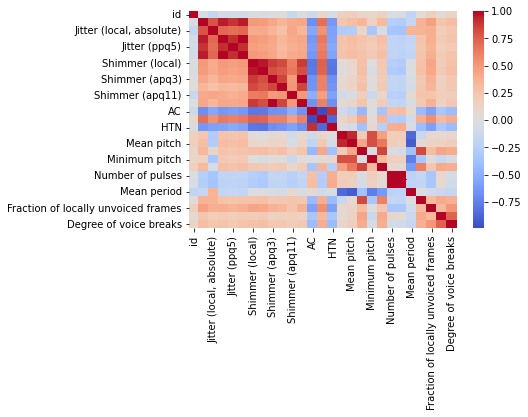

In [ ]:
sns.heatmap(corr, cmap="coolwarm")

In [ ]:
corr

,id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
id,1.000000,-0.040571,-0.151738,-0.060465,-0.066361,-0.060465,-0.008484,-0.026167,0.007070,0.022538,-0.148103,0.007070,-0.114923,0.114001,-0.046217,0.155728,0.169613,0.119949,0.107357,0.154136,-0.021695,-0.027577,-0.186040,0.046831,0.170824,0.074009,0.125489
Jitter (local),-0.040571,1.000000,0.791693,0.955695,0.906154,0.955694,0.498113,0.490327,0.434851,0.352898,0.422116,0.434850,-0.675560,0.684339,-0.626581,0.245306,0.297687,0.341959,0.144057,0.318758,-0.254562,-0.269148,-0.151866,0.375978,0.464826,0.251289,0.312365
"Jitter (local, absolute)",-0.151738,0.791693,1.000000,0.724970,0.691153,0.724970,0.413634,0.424462,0.350243,0.274999,0.438765,0.350242,-0.545696,0.534005,-0.573300,-0.287314,-0.266953,0.115603,-0.328641,-0.036702,-0.340791,-0.345273,0.357982,0.370202,0.388623,0.187589,0.245861
Jitter (rap),-0.060465,0.955695,0.724970,1.000000,0.915695,1.000000,0.499045,0.484393,0.440373,0.345303,0.411394,0.440372,-0.627378,0.644595,-0.565498,0.266829,0.312960,0.265089,0.217050,0.296577,-0.195857,-0.208542,-0.179820,0.265801,0.392331,0.200454,0.262853
Jitter (ppq5),-0.066361,0.906154,0.691153,0.915695,1.000000,0.915695,0.475906,0.461335,0.419708,0.316597,0.383756,0.419709,-0.595376,0.617289,-0.530796,0.246386,0.285225,0.243424,0.196605,0.267908,-0.186628,-0.197998,-0.163408,0.251063,0.364609,0.184184,0.219275
Jitter (ddp),-0.060465,0.955694,0.724970,1.000000,0.915695,1.000000,0.499047,0.484395,0.440374,0.345306,0.411404,0.440374,-0.627382,0.644600,-0.565502,0.266821,0.312953,0.265094,0.217043,0.296586,-0.195850,-0.208536,-0.179809,0.265812,0.392328,0.200468,0.262860
Shimmer (local),-0.008484,0.498113,0.413634,0.499045,0.475906,0.499047,1.000000,0.963551,0.882122,0.830953,0.633170,0.882123,-0.780475,0.747700,-0.779693,0.042970,0.103500,0.282298,0.004283,0.223785,-0.255359,-0.269455,-0.017658,0.275186,0.441514,0.197883,0.277248
"Shimmer (local, dB)",-0.026167,0.490327,0.424462,0.484393,0.461335,0.484395,0.963551,1.000000,0.817004,0.771766,0.657087,0.817004,-0.775145,0.738582,-0.802216,0.012741,0.079082,0.295744,-0.035716,0.222664,-0.287413,-0.301042,-0.010253,0.291130,0.430987,0.219295,0.295757
Shimmer (apq3),0.007070,0.434851,0.350243,0.440373,0.419708,0.440374,0.882122,0.817004,1.000000,0.845950,0.500094,1.000000,-0.656816,0.615328,-0.668204,0.072499,0.117252,0.248123,0.033939,0.193433,-0.172035,-0.185487,-0.036735,0.227394,0.377617,0.150580,0.231756
Shimmer (apq5),0.022538,0.352898,0.274999,0.345303,0.316597,0.345306,0.830953,0.771766,0.845950,1.000000,0.519549,0.845950,-0.646273,0.613494,-0.637974,0.070420,0.127193,0.280402,0.014233,0.221337,-0.178726,-0.192401,-0.065328,0.245744,0.348894,0.168097,0.227661


In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
data = X[selected_columns]

In [ ]:
selected_columns

Index(['id', 'Jitter (local)', 'Jitter (local, absolute)', 'Shimmer (local)',
       'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'AC', 'NTH',
       'Median pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch',
       'Number of pulses', 'Mean period', 'Standard deviation of period',
       'Fraction of locally unvoiced frames', 'Number of voice breaks',
       'Degree of voice breaks'],
      dtype='object')

In [ ]:
data

,id,Jitter (local),"Jitter (local, absolute)",Shimmer (local),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),AC,NTH,Median pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
0,1,1.488,0.000090,8.334,4.517,4.609,6.802,0.905905,0.119116,166.533,10.421,142.229,187.576,160,0.006065,0.000416,0.000,0,0.000
1,1,0.728,0.000038,5.864,2.058,3.180,7.194,0.951285,0.066758,195.252,14.773,159.515,234.505,170,0.005181,0.000403,2.247,0,0.000
2,1,1.220,0.000074,8.719,4.347,5.166,7.548,0.911508,0.109983,158.689,12.981,146.445,211.442,1431,0.006071,0.000474,10.656,1,0.178
3,1,2.502,0.000123,13.513,5.263,8.771,16.779,0.901302,0.121982,201.997,10.853,182.713,220.230,94,0.004910,0.000320,0.000,0,0.000
4,1,3.509,0.000167,9.112,3.102,4.927,12.823,0.856907,0.236831,211.887,11.499,182.821,225.162,117,0.004757,0.000380,18.182,1,13.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,9.846,4.593,6.806,8.303,0.754472,0.430569,126.492,14.387,96.145,158.591,63,0.007766,0.001066,24.194,2,15.113
1036,40,1.757,0.000133,7.571,2.720,3.927,11.928,0.880775,0.160787,128.142,7.140,121.490,143.797,47,0.007561,0.000430,46.053,1,25.792
1037,40,2.912,0.000226,15.489,6.433,10.138,14.239,0.883146,0.161736,129.727,13.593,95.921,149.641,79,0.007767,0.000881,20.000,1,4.574
1038,40,3.788,0.000275,15.702,6.374,11.094,18.818,0.765474,0.423034,126.131,46.764,90.051,451.366,75,0.007257,0.001714,16.667,3,19.575


In [ ]:
for i in X.columns:
    X[i] = X[i].astype(float)

In [ ]:
Y["class information"] = Y["class information"].astype(float)

In [ ]:
def fisher_index(X, plot=True):
    C = X.shape[1]
    indexes = np.zeros(27)

    j = 0
    for i in range(C):
        if_j = 0
        for k in range(C):
            if i == k:
                continue
            mean_i = np.mean(X[:,i])
            mean_k = np.mean(X[:,k])
            std_i = np.std(X[:,i])
            std_k = np.std(X[:,k])

            if_j += ((mean_i - mean_k)**2 )/(std_i**2 + std_k**2)
        indexes[j] = if_j
        j += 1

    indexes = indexes / np.max(indexes)
  
    if plot == True:
        x = np.array(np.linspace(1, C, C))
        y = indexes
        plt.stem(x, y)
        plt.xlabel('Variables')
        plt.ylabel('Índice de fisher')
        plt.show()    
    return indexes



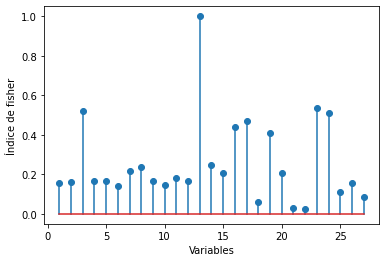

array([0.15815548, 0.16065091, 0.5215864 , 0.16852098, 0.16400612,
       0.14031805, 0.21720562, 0.23630016, 0.16891561, 0.14670684,
       0.17923649, 0.16858044, 1.        , 0.24785674, 0.20789986,
       0.43843832, 0.46992253, 0.06101246, 0.41148161, 0.20625802,
       0.02866313, 0.02713427, 0.53645451, 0.51149531, 0.1108161 ,
       0.15467629, 0.08641061])

In [ ]:
fisher_index(X.values, plot=True)


PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca = PCA(n_components=14)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

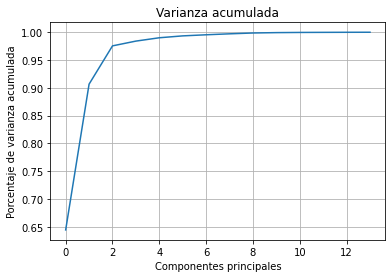

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

In [ ]:
pcaDef = PCA(n_components=8)
pcaDef.fit(X)
X_pca = pcaDef.transform(X)
X_test_pca = pcaDef.transform(X_to_test)


In [ ]:
X_all = X_pca
y_all = Y['class information'].values
QDA_all = QuadraticDiscriminantAnalysis(reg_param=0.1, store_covariance=True, tol=0.0001)
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
QDA_all.fit(X_all, y_all)
predictQDA2 = QDA_all.predict(X_test_pca)
accuracyQDA2 = metrics.accuracy_score(Y_to_test, predictQDA2)
precisionQDA2 = metrics.precision_score(Y_to_test, predictQDA2)
recallQDA2 = metrics. recall_score(Y_to_test, predictQDA2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Analisis discriminante quadratico': [accuracyQDA2, precisionQDA2, recallQDA2]
    })
table

,Metric,Analisis discriminante quadratico
0,Accuracy,0.553571
1,Precision,1.000000
2,Recall,0.553571


In [ ]:
predictQDA2.shape
Errores = np.ones(predictQDA2.shape)

In [ ]:
X_all = X_pca
y_all = Y['class information'].values
SVM_all = SVC(C=10,gamma=0.001, kernel='linear')
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
SVM_all.fit(X_all, y_all)
predictSVM2 = SVM_all.predict(X_test_pca)
accuracySVM2 = metrics.accuracy_score(predictSVM2, Y_to_test)
precisionSVM2 = metrics.precision_score(predictSVM2, Y_to_test)
recallSVM2 = metrics. recall_score(predictSVM2, Y_to_test)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'SVM': [accuracySVM2, precisionSVM2, recallSVM2]
    })
table

,Metric,SVM
0,Accuracy,0.607143
1,Precision,0.607143
2,Recall,1.000000


In [ ]:
X_all = X_pca
y_all = Y['class information'].values
GBT_all = GradientBoostingClassifier(loss='exponential', n_estimators=10)
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
GBT_all.fit(X_all, y_all)
predictGBT2 = GBT_all.predict(X_test_pca)
accuracyGBT2 = metrics.accuracy_score(Y_to_test, predictGBT2)
precisionGBT2 = metrics.precision_score(Y_to_test, predictGBT2)
recallGBT2 = metrics. recall_score(Y_to_test, predictGBT2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Gradient boosting tree': [accuracyGBT2, precisionGBT2, recallGBT2]
    })
table

,Metric,Gradient boosting tree
0,Accuracy,0.52381
1,Precision,1.00000
2,Recall,0.52381


# Selección de Características tipo Wrapper - Sequential Backward

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import svm

In [ ]:
scaler = StandardScaler()
X_1 = scaler.fit_transform(X)

In [ ]:
sfs1 = SFS(svm.SVC(), 
           k_features=14,
           forward=False,
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=-1)
sfs1 = sfs1.fit(X_1, Y)
print('\nSequential Forward Selection (k=14):')
print(sfs1.k_feature_idx_)
print('CV Score:')
print(sfs1.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    4.3s finished

[2021-10-12 04:32:59] Features: 26/14 -- score: 0.4923076923076922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    2.6s finished

[2021-10-12 04:33:01] Features: 25/14 -- score: 0.5230769230769231[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished

[2021-10-12 04:33:04] Features: 24/14 -- score: 0.5538461538461539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.3s finished

[2021-10-12 04:33:06] Features: 23/14 -- score: 0.5653846153846154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    2.2s finish


Sequential Forward Selection (k=15):
(0, 1, 2, 3, 4, 5, 6, 8, 10, 14, 15, 16, 22, 25)
CV Score:
0.6846153846153845


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.2s finished

[2021-10-12 04:33:21] Features: 14/14 -- score: 0.6846153846153845

In [ ]:
sfs2 = SFS(svm.SVC(), 
           k_features=8,
           forward=False,
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=-1)
sfs2 = sfs2.fit(X_1, Y)
print('\nSequential Forward Selection (k=8):')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    4.0s finished

[2021-10-12 04:40:18] Features: 26/8 -- score: 0.4923076923076922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    2.6s finished

[2021-10-12 04:40:21] Features: 25/8 -- score: 0.5230769230769231[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    2.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished

[2021-10-12 04:40:23] Features: 24/8 -- score: 0.5538461538461539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.3s finished

[2021-10-12 04:40:26] Features: 23/8 -- score: 0.5653846153846154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent 


Sequential Forward Selection (k=10):
(0, 1, 3, 4, 6, 10, 15, 25)
CV Score:
0.7461538461538462


[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2021-10-12 04:40:45] Features: 8/8 -- score: 0.7461538461538462

In [ ]:
X_selected14 = X[['Jitter (local, absolute)', 'Shimmer (local)', 'Shimmer (local, dB)',
        'AC', 'NTH', 'HTN',
       'Median pitch', 'Mean pitch', 'Minimum pitch', 'Maximum pitch',
                                               'Number of pulses', 'Number of periods', 'Mean period',
                                               'Standard deviation of period']]

In [ ]:
X_test_selected14 = X_to_test[['Jitter (local, absolute)', 'Shimmer (local)', 'Shimmer (local, dB)',
        'AC', 'NTH', 'HTN',
       'Median pitch', 'Mean pitch', 'Minimum pitch', 'Maximum pitch',
                                               'Number of pulses', 'Number of periods', 'Mean period',
                                               'Standard deviation of period']]

In [ ]:
X_all = X_selected14.values
y_all = Y['class information'].values
QDA_all = QuadraticDiscriminantAnalysis(reg_param=0.1, store_covariance=True, tol=0.0001)
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
QDA_all.fit(X_all, y_all)
predictQDA2 = QDA_all.predict(X_test_selected14)
accuracyQDA2 = metrics.accuracy_score(Y_to_test, predictQDA2)
precisionQDA2 = metrics.precision_score(Y_to_test, predictQDA2)
recallQDA2 = metrics. recall_score(Y_to_test, predictQDA2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Analisis discriminante quadratico': [accuracyQDA2, precisionQDA2, recallQDA2]
    })
table

,Metric,Analisis discriminante quadratico
0,Accuracy,0.791667
1,Precision,1.000000
2,Recall,0.791667


In [ ]:
X_all = X_selected14.values
y_all = Y['class information'].values
SVM_all = SVC(C=10,gamma=0.001, kernel='linear')
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
SVM_all.fit(X_all, y_all)
predictSVM2 = SVM_all.predict(X_test_selected14)
accuracySVM2 = metrics.accuracy_score(predictSVM2, Y_to_test)
precisionSVM2 = metrics.precision_score(predictSVM2, Y_to_test)
recallSVM2 = metrics. recall_score(predictSVM2, Y_to_test)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'SVM': [accuracySVM2, precisionSVM2, recallSVM2]
    })
table

In [ ]:
X_all = X_selected14.values
y_all = Y['class information'].values
GBT_all = GradientBoostingClassifier(loss='exponential', n_estimators=10)
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
GBT_all.fit(X_all, y_all)
predictGBT2 = GBT_all.predict(X_test_selected14)
accuracyGBT2 = metrics.accuracy_score(Y_to_test, predictGBT2)
precisionGBT2 = metrics.precision_score(Y_to_test, predictGBT2)
recallGBT2 = metrics. recall_score(Y_to_test, predictGBT2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Gradient boosting tree': [accuracyGBT2, precisionGBT2, recallGBT2]
    })
table

In [ ]:
X_selected8 = X[['Jitter (local, absolute)', 'AC', 
       'Median pitch', 'Mean pitch', 'Minimum pitch', 
        'Mean period', 'Standard deviation of period']]

In [ ]:
X_test_selected8 = X_to_test[['Jitter (local, absolute)', 'AC', 
       'Median pitch', 'Mean pitch', 'Minimum pitch', 
        'Mean period', 'Standard deviation of period']]

In [ ]:
X_all = X_selected8.values
y_all = Y['class information'].values
QDA_all = QuadraticDiscriminantAnalysis(reg_param=0.1, store_covariance=True, tol=0.0001)
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
QDA_all.fit(X_all, y_all)
predictQDA2 = QDA_all.predict(X_test_selected8)
accuracyQDA2 = metrics.accuracy_score(Y_to_test, predictQDA2)
precisionQDA2 = metrics.precision_score(Y_to_test, predictQDA2)
recallQDA2 = metrics. recall_score(Y_to_test, predictQDA2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Analisis discriminante quadratico': [accuracyQDA2, precisionQDA2, recallQDA2]
    })
table

In [ ]:
X_all = X_selected8.values
y_all = Y['class information'].values
SVM_all = SVC(C=10,gamma=0.001, kernel='linear')
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
SVM_all.fit(X_all, y_all)
predictSVM2 = SVM_all.predict(X_test_selected8)
accuracySVM2 = metrics.accuracy_score(predictSVM2, Y_to_test)
precisionSVM2 = metrics.precision_score(predictSVM2, Y_to_test)
recallSVM2 = metrics. recall_score(predictSVM2, Y_to_test)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'SVM': [accuracySVM2, precisionSVM2, recallSVM2]
    })
table

In [ ]:
X_all = X_selected8.values
y_all = Y['class information'].values
GBT_all = GradientBoostingClassifier(loss='exponential', n_estimators=10)
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
GBT_all.fit(X_all, y_all)
predictGBT2 = GBT_all.predict(X_test_selected8)
accuracyGBT2 = metrics.accuracy_score(Y_to_test, predictGBT2)
precisionGBT2 = metrics.precision_score(Y_to_test, predictGBT2)
recallGBT2 = metrics. recall_score(Y_to_test, predictGBT2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Gradient boosting tree': [accuracyGBT2, precisionGBT2, recallGBT2]
    })
table